In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886101301PNS003SRSPEC00B3.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.248e-02 +/- 2.046e-03 (77.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-10
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 7131 sec
 Using fit statistic: chi
 Using Background File                P0886101301PNS003BGSPEC00B3.FTZ
  Background Exposure Time: 7131 sec
 Using Response (RMF) File            epn_e3_ff20_sdY3.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886101301PNS003SRCARF00B3.FTZ



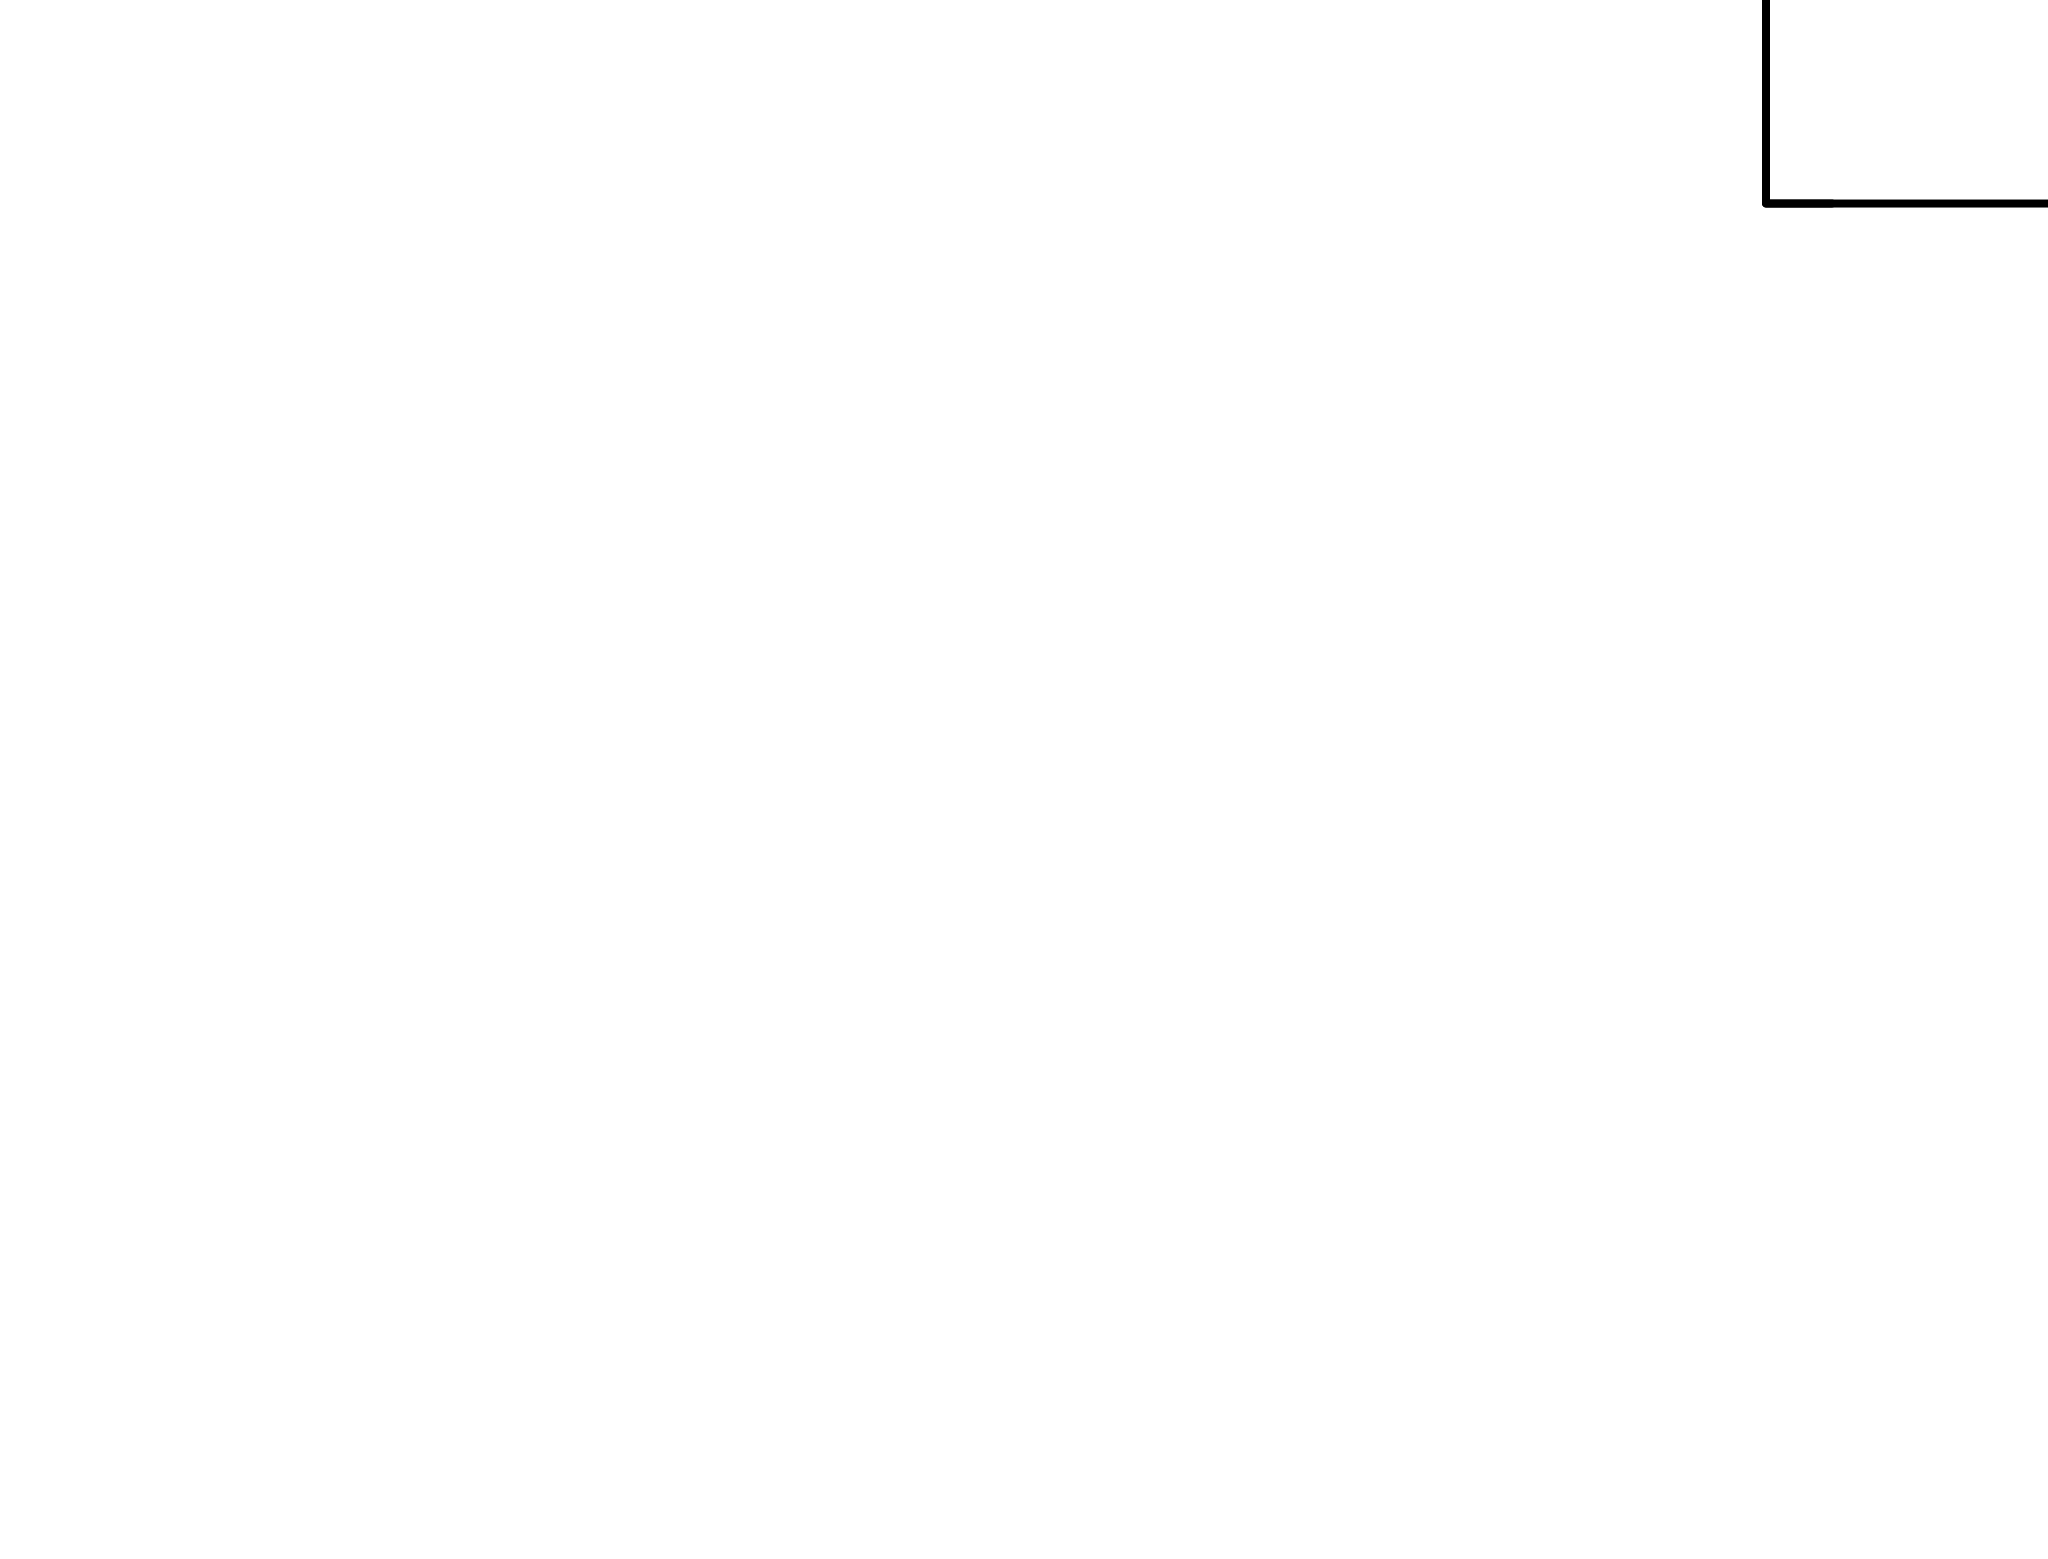

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.0001 0.02")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (10) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner

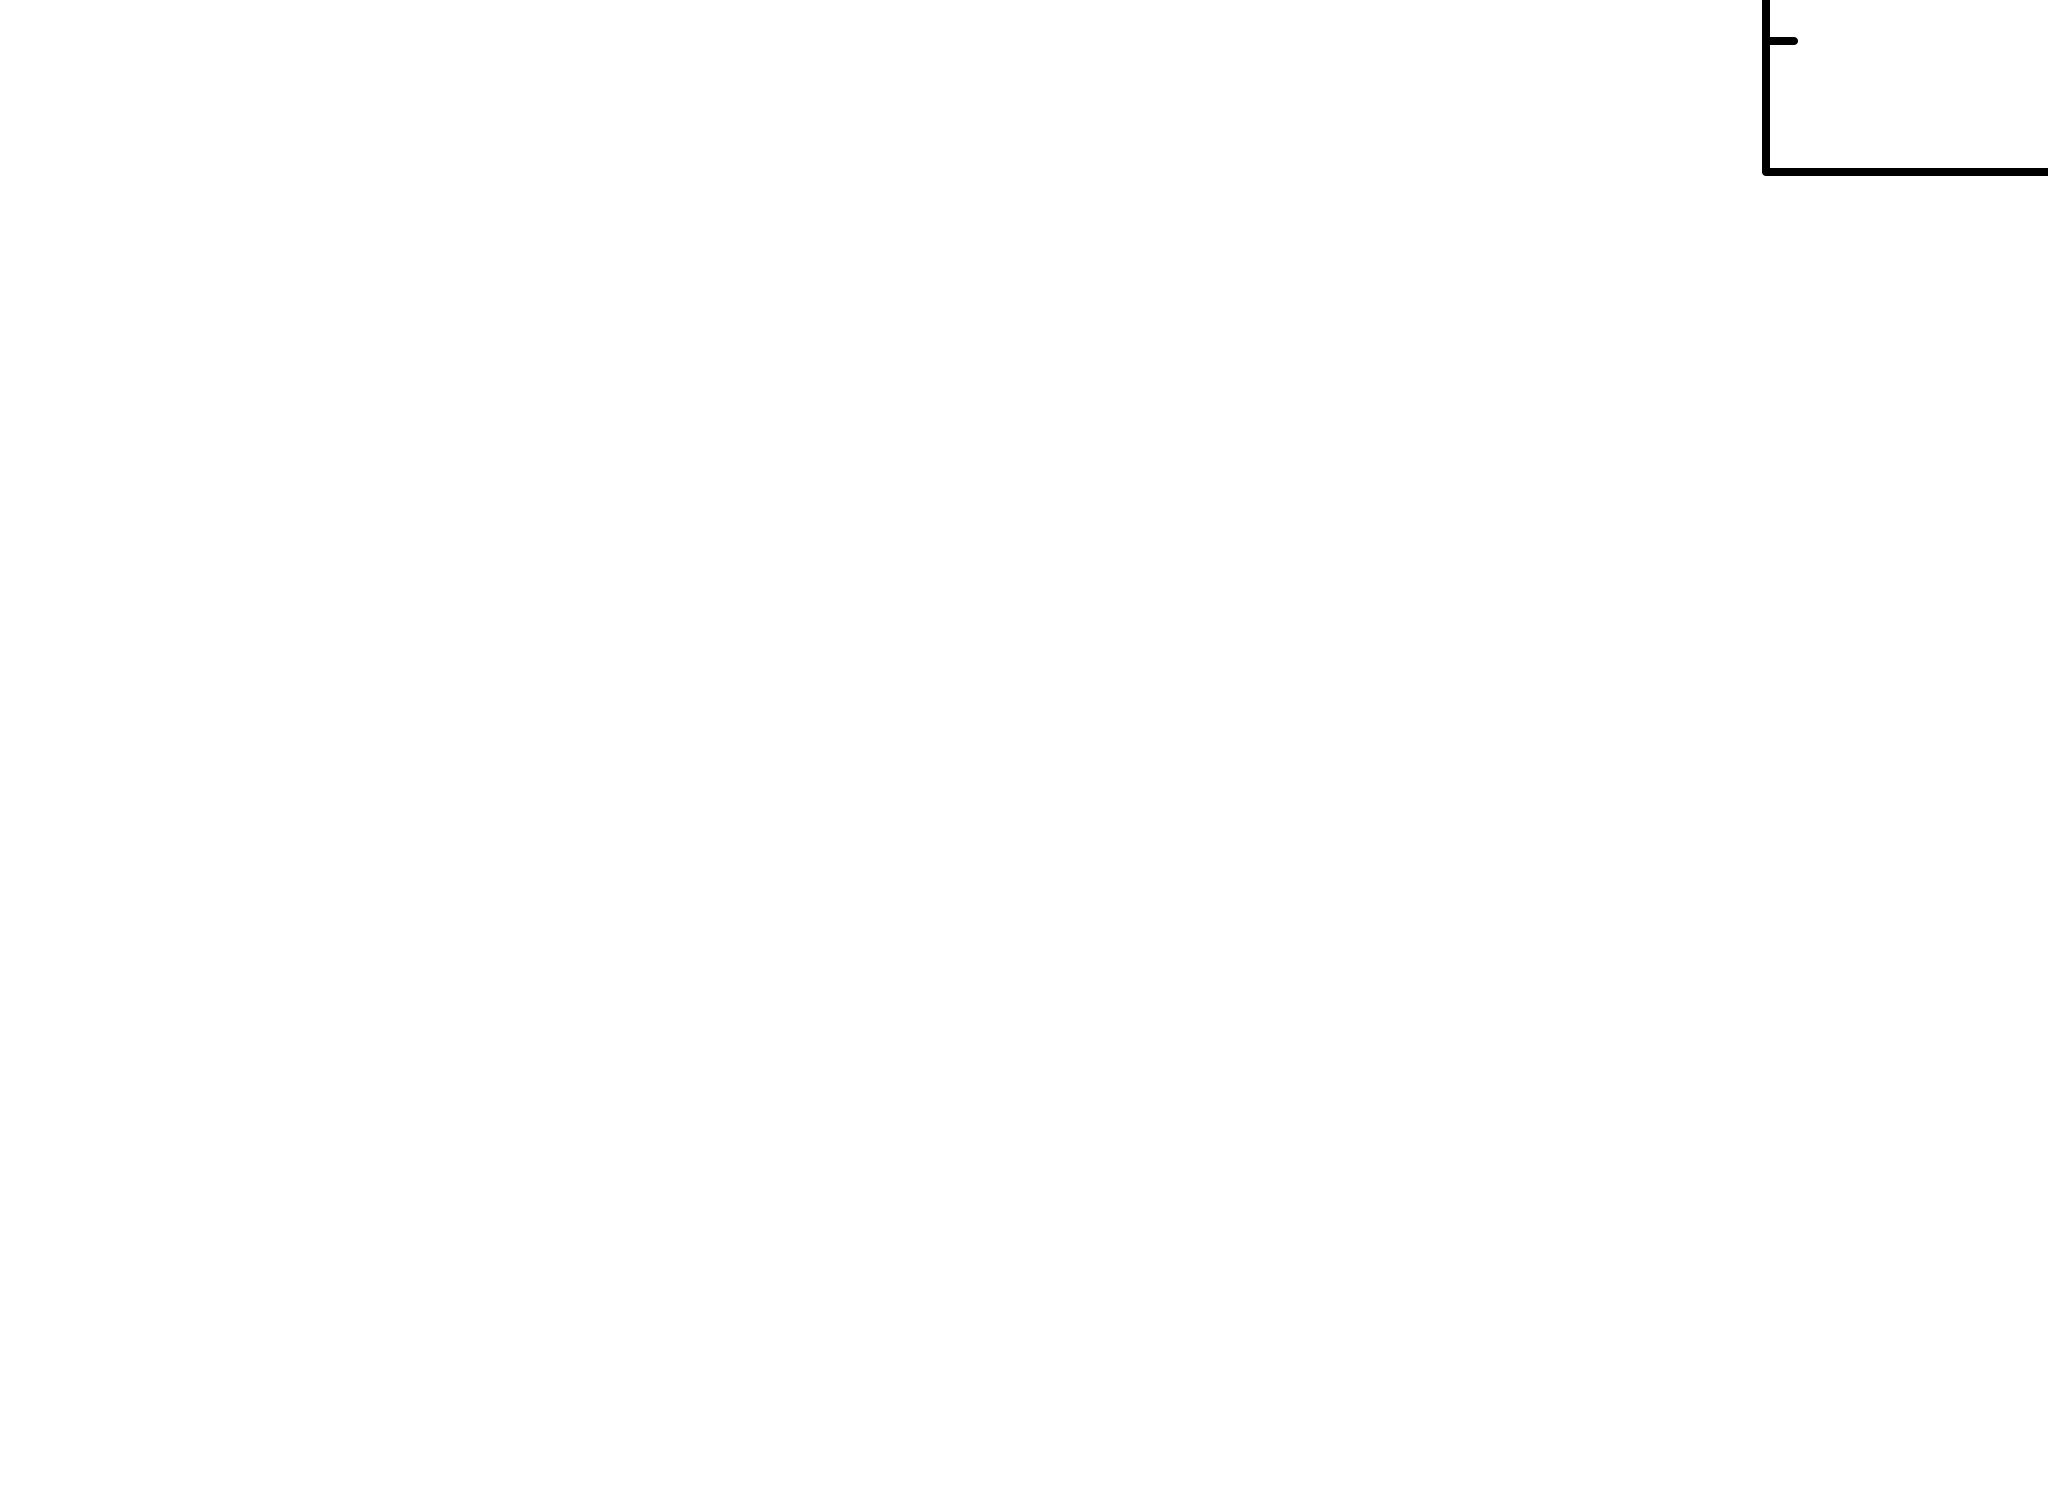

In [3]:
spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.732479e+10     using 9 bins.

Test statistic : Chi-Squared              2.732479e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
45.6154      5.94005      -1      0.477215       1.10535   3.02832e-05
19.6095      235133       -2      0.120712      0.975310   2.78838e-05
13.733       258008       -3      0.316986       1.80199   6.12804e-05
6

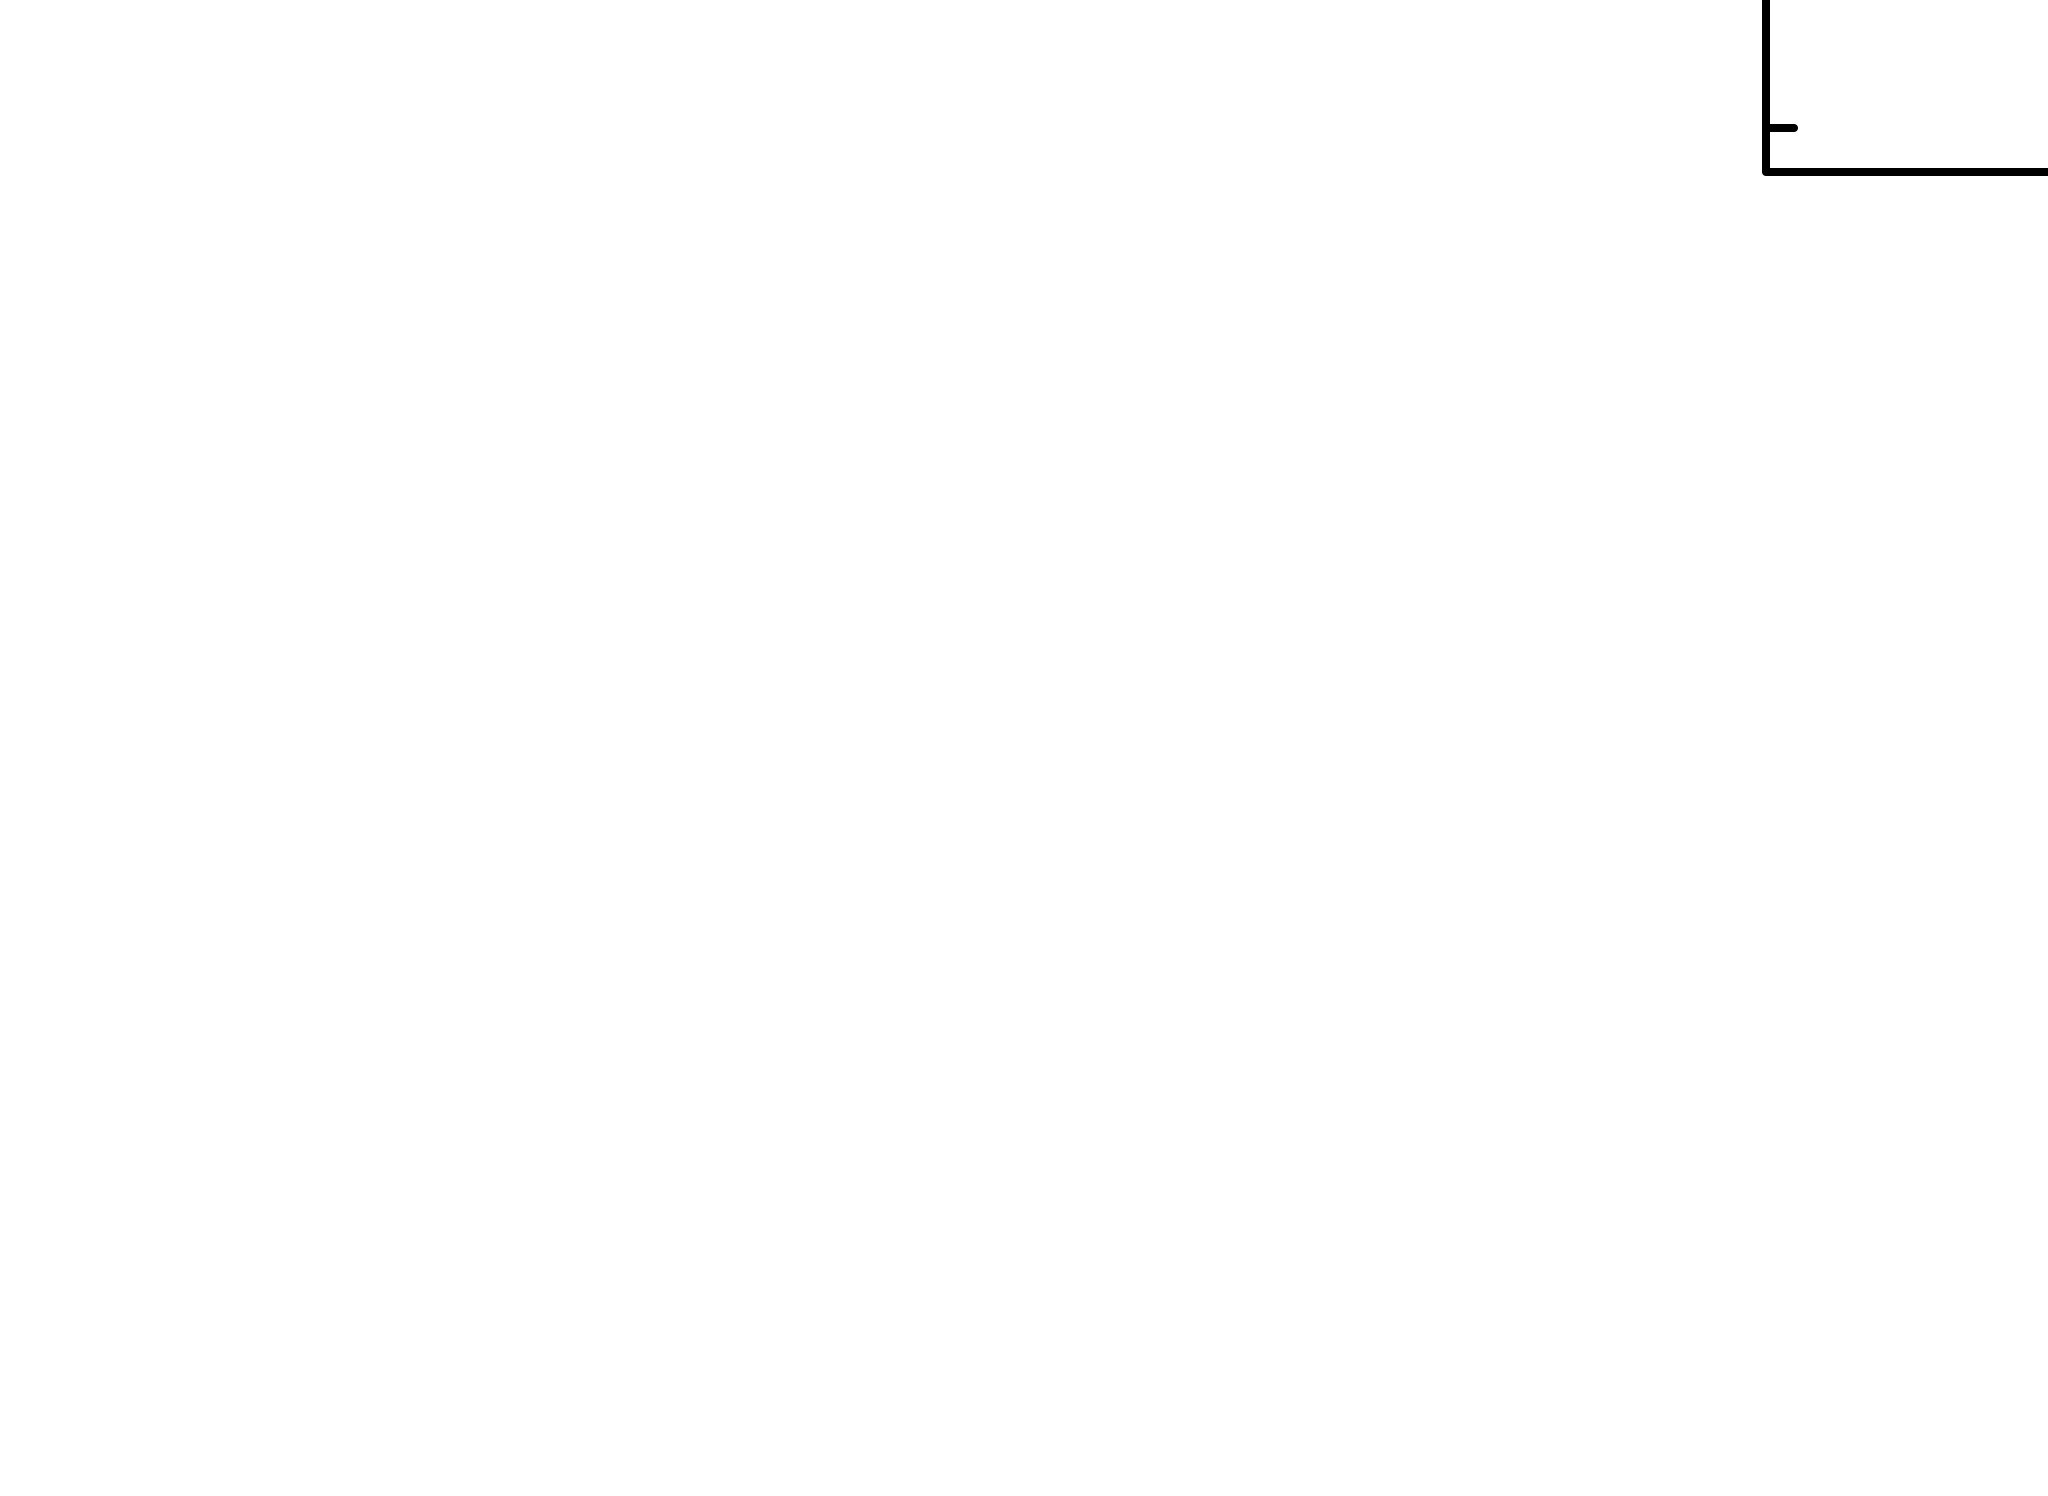

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

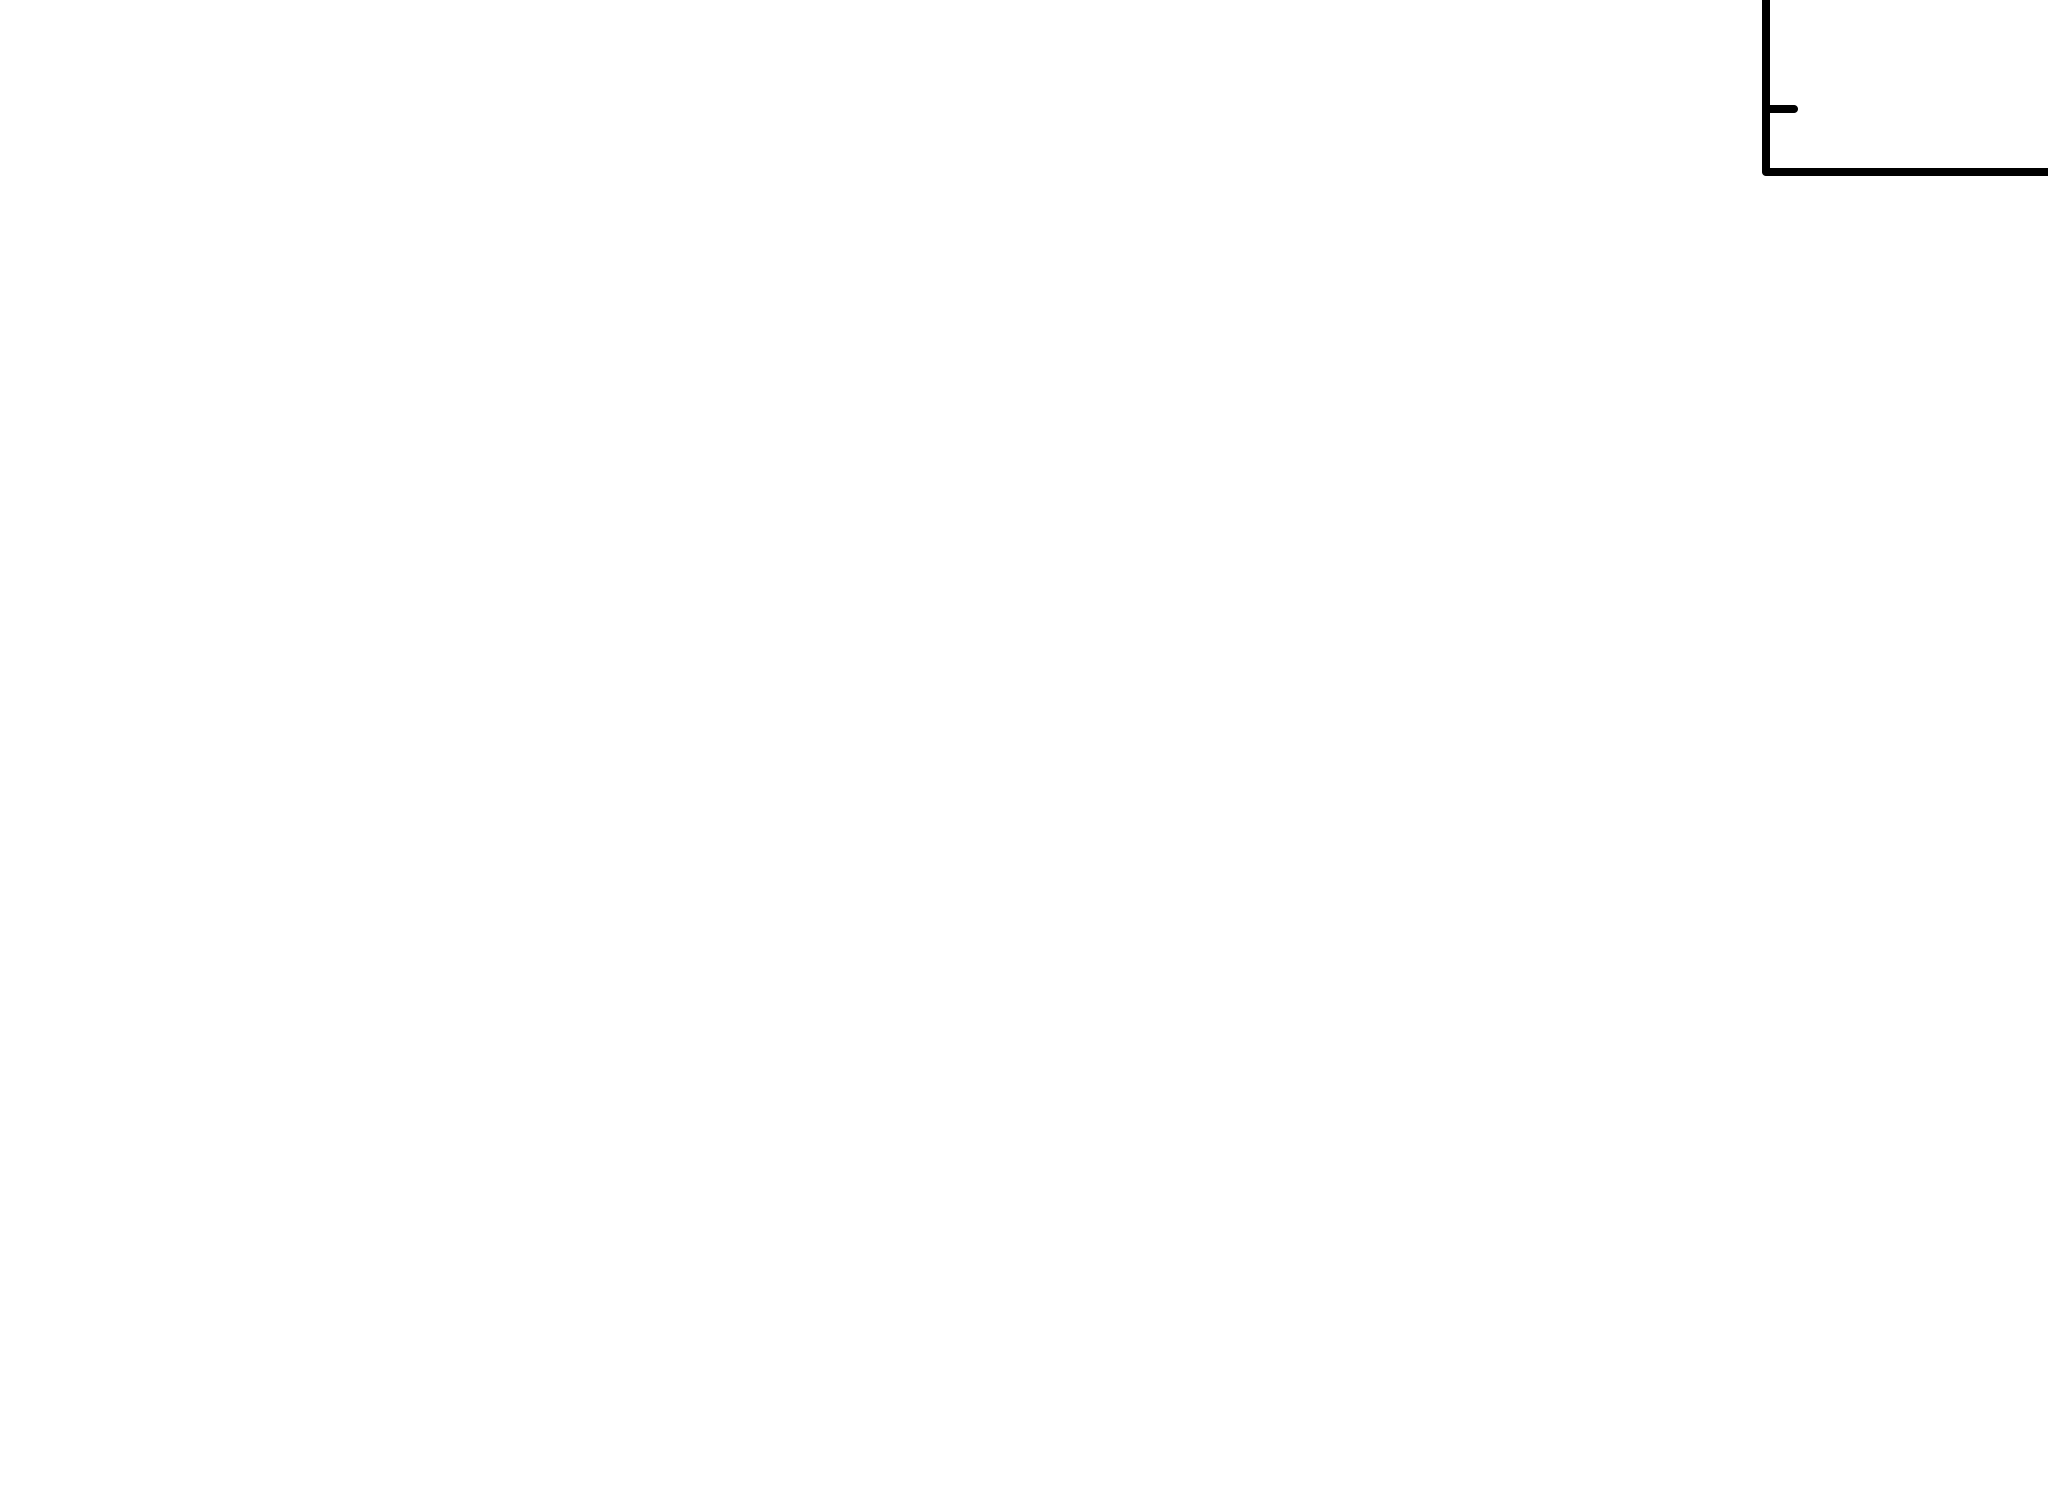


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.755032e+09     using 9 bins.

Test statistic : Chi-Squared              4.755032e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
28.1404      5.5842       -1      0.398410       8.92965   6.46371e-05
8.75697      123671       -2      0.166464       15.2175   7.46977e-05
8.4784       35813.7      -3      0.234881       4.32613   8.51446e-05
7.2

In [5]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              1.008266e+09     using 9 bins.

Test statistic : Chi-Squared              1.008266e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
22.6916      9.18891      -3       1.02456       1.24701   0.0

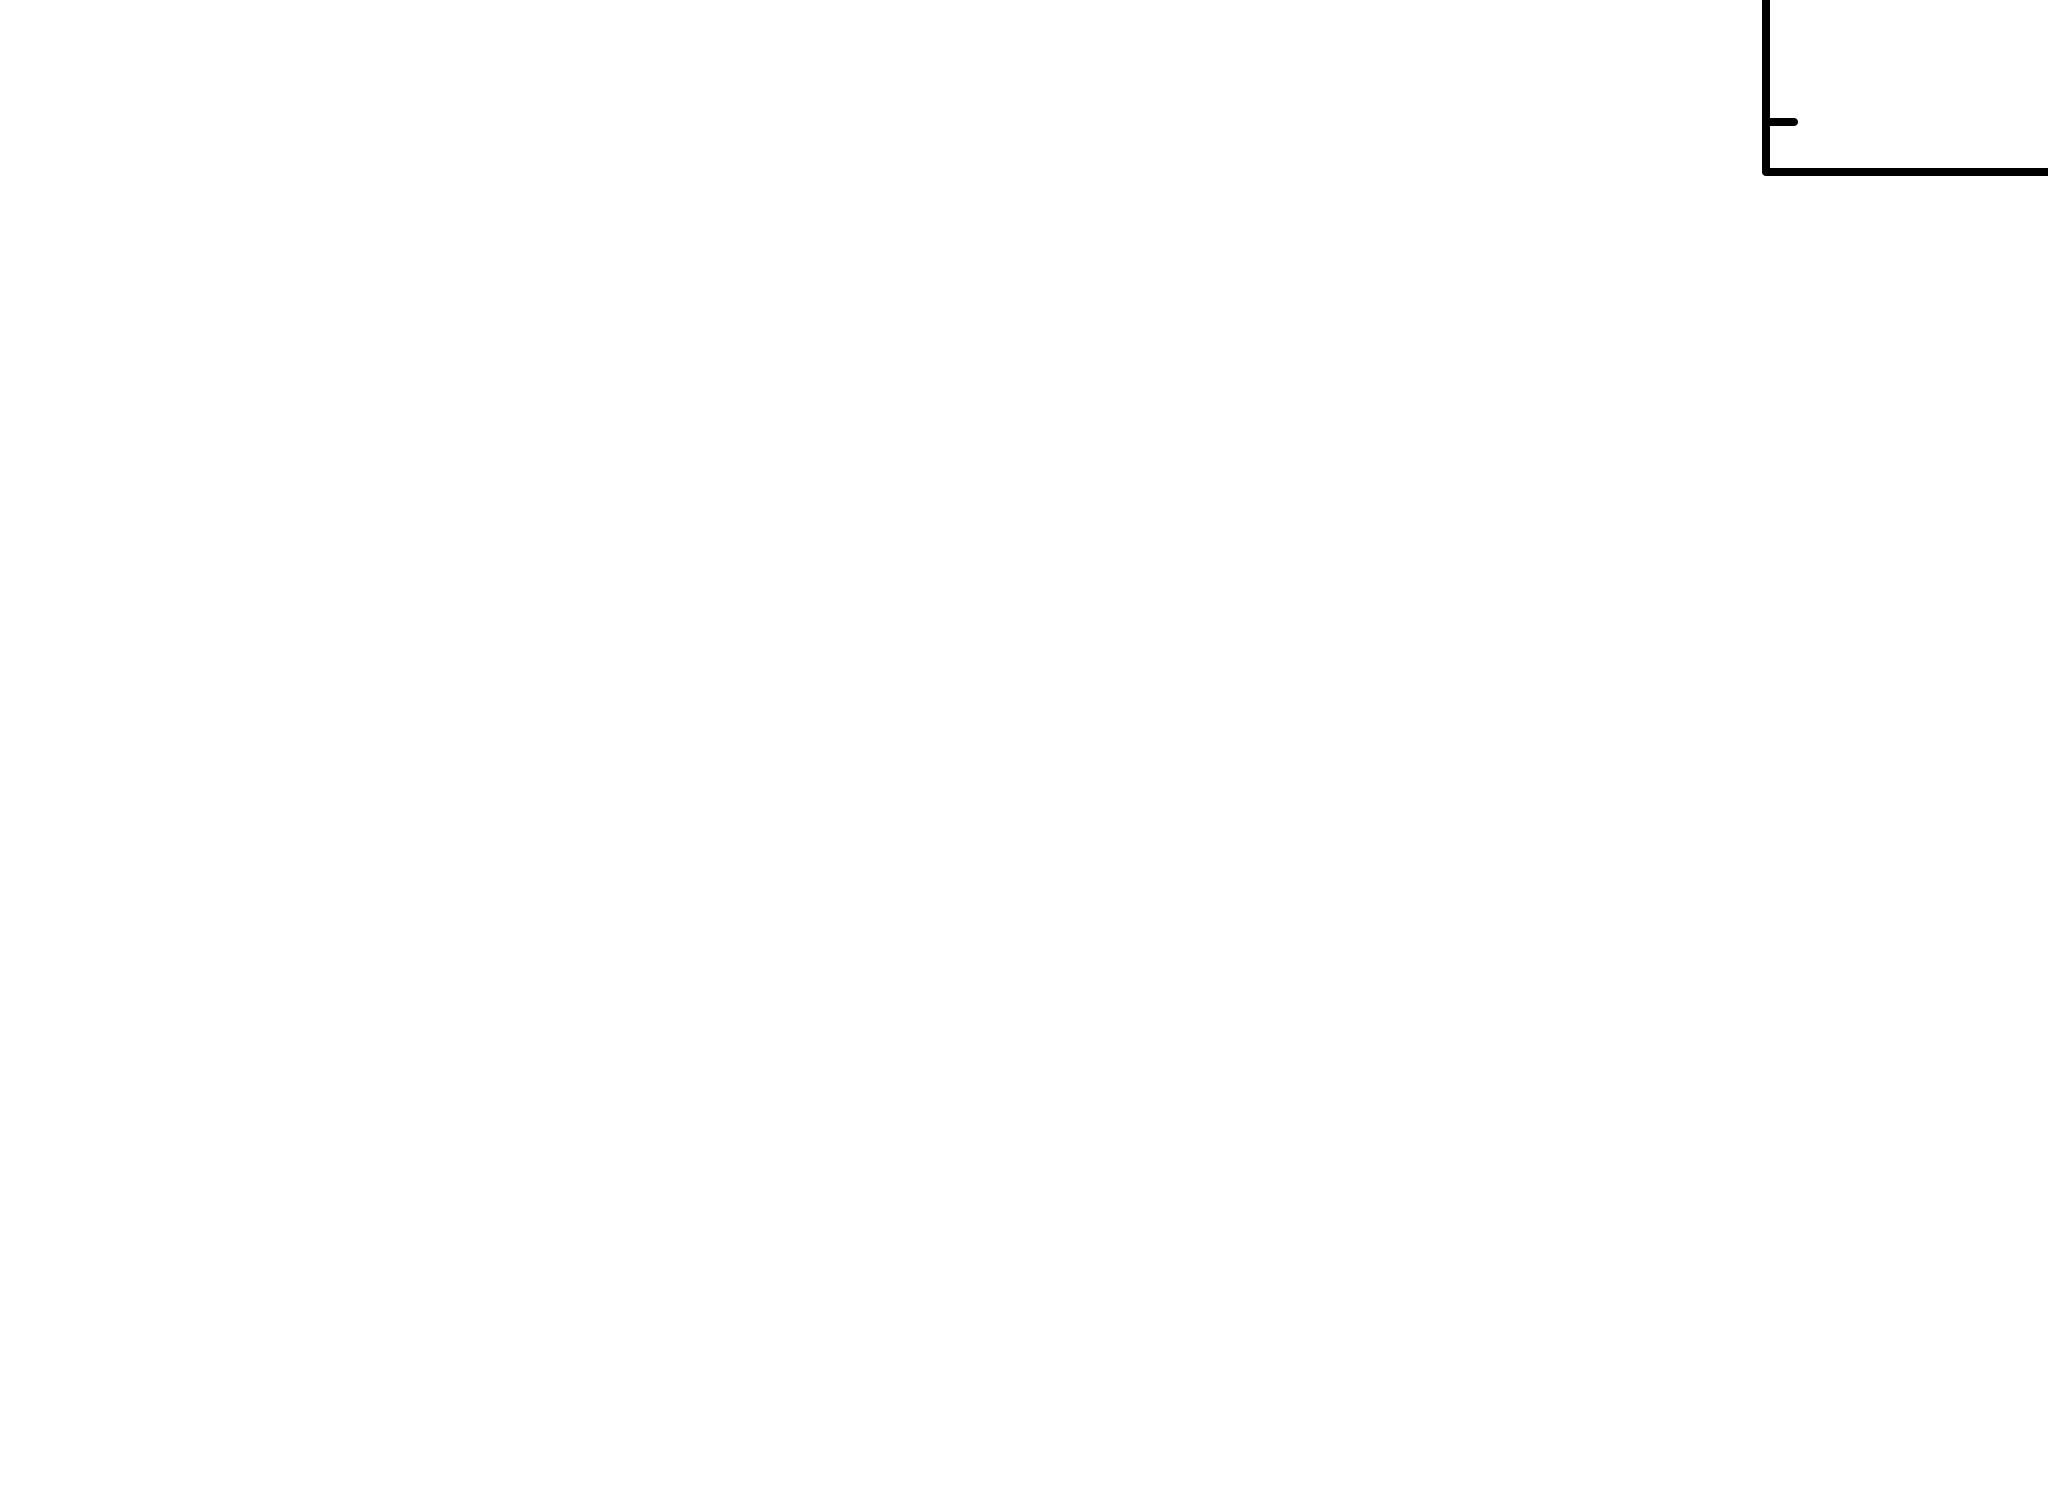

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 8.6851e-05 photons (3.5446e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
plx = 0.653
d_kpc = 1/plx
F_x = 3.5446*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

9.943112505545046e+31


In [9]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

1.5313935681470137
31.99752235345083


In [10]:
F_opt = 1.05*10**-5 * 10**(-0.4*15.49)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  6.6863529695331066e-12
F_x / F_opt:  -1.275622065924398



Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.034255e+09     using 9 bins.

Test statistic : Chi-Squared              4.034255e+09

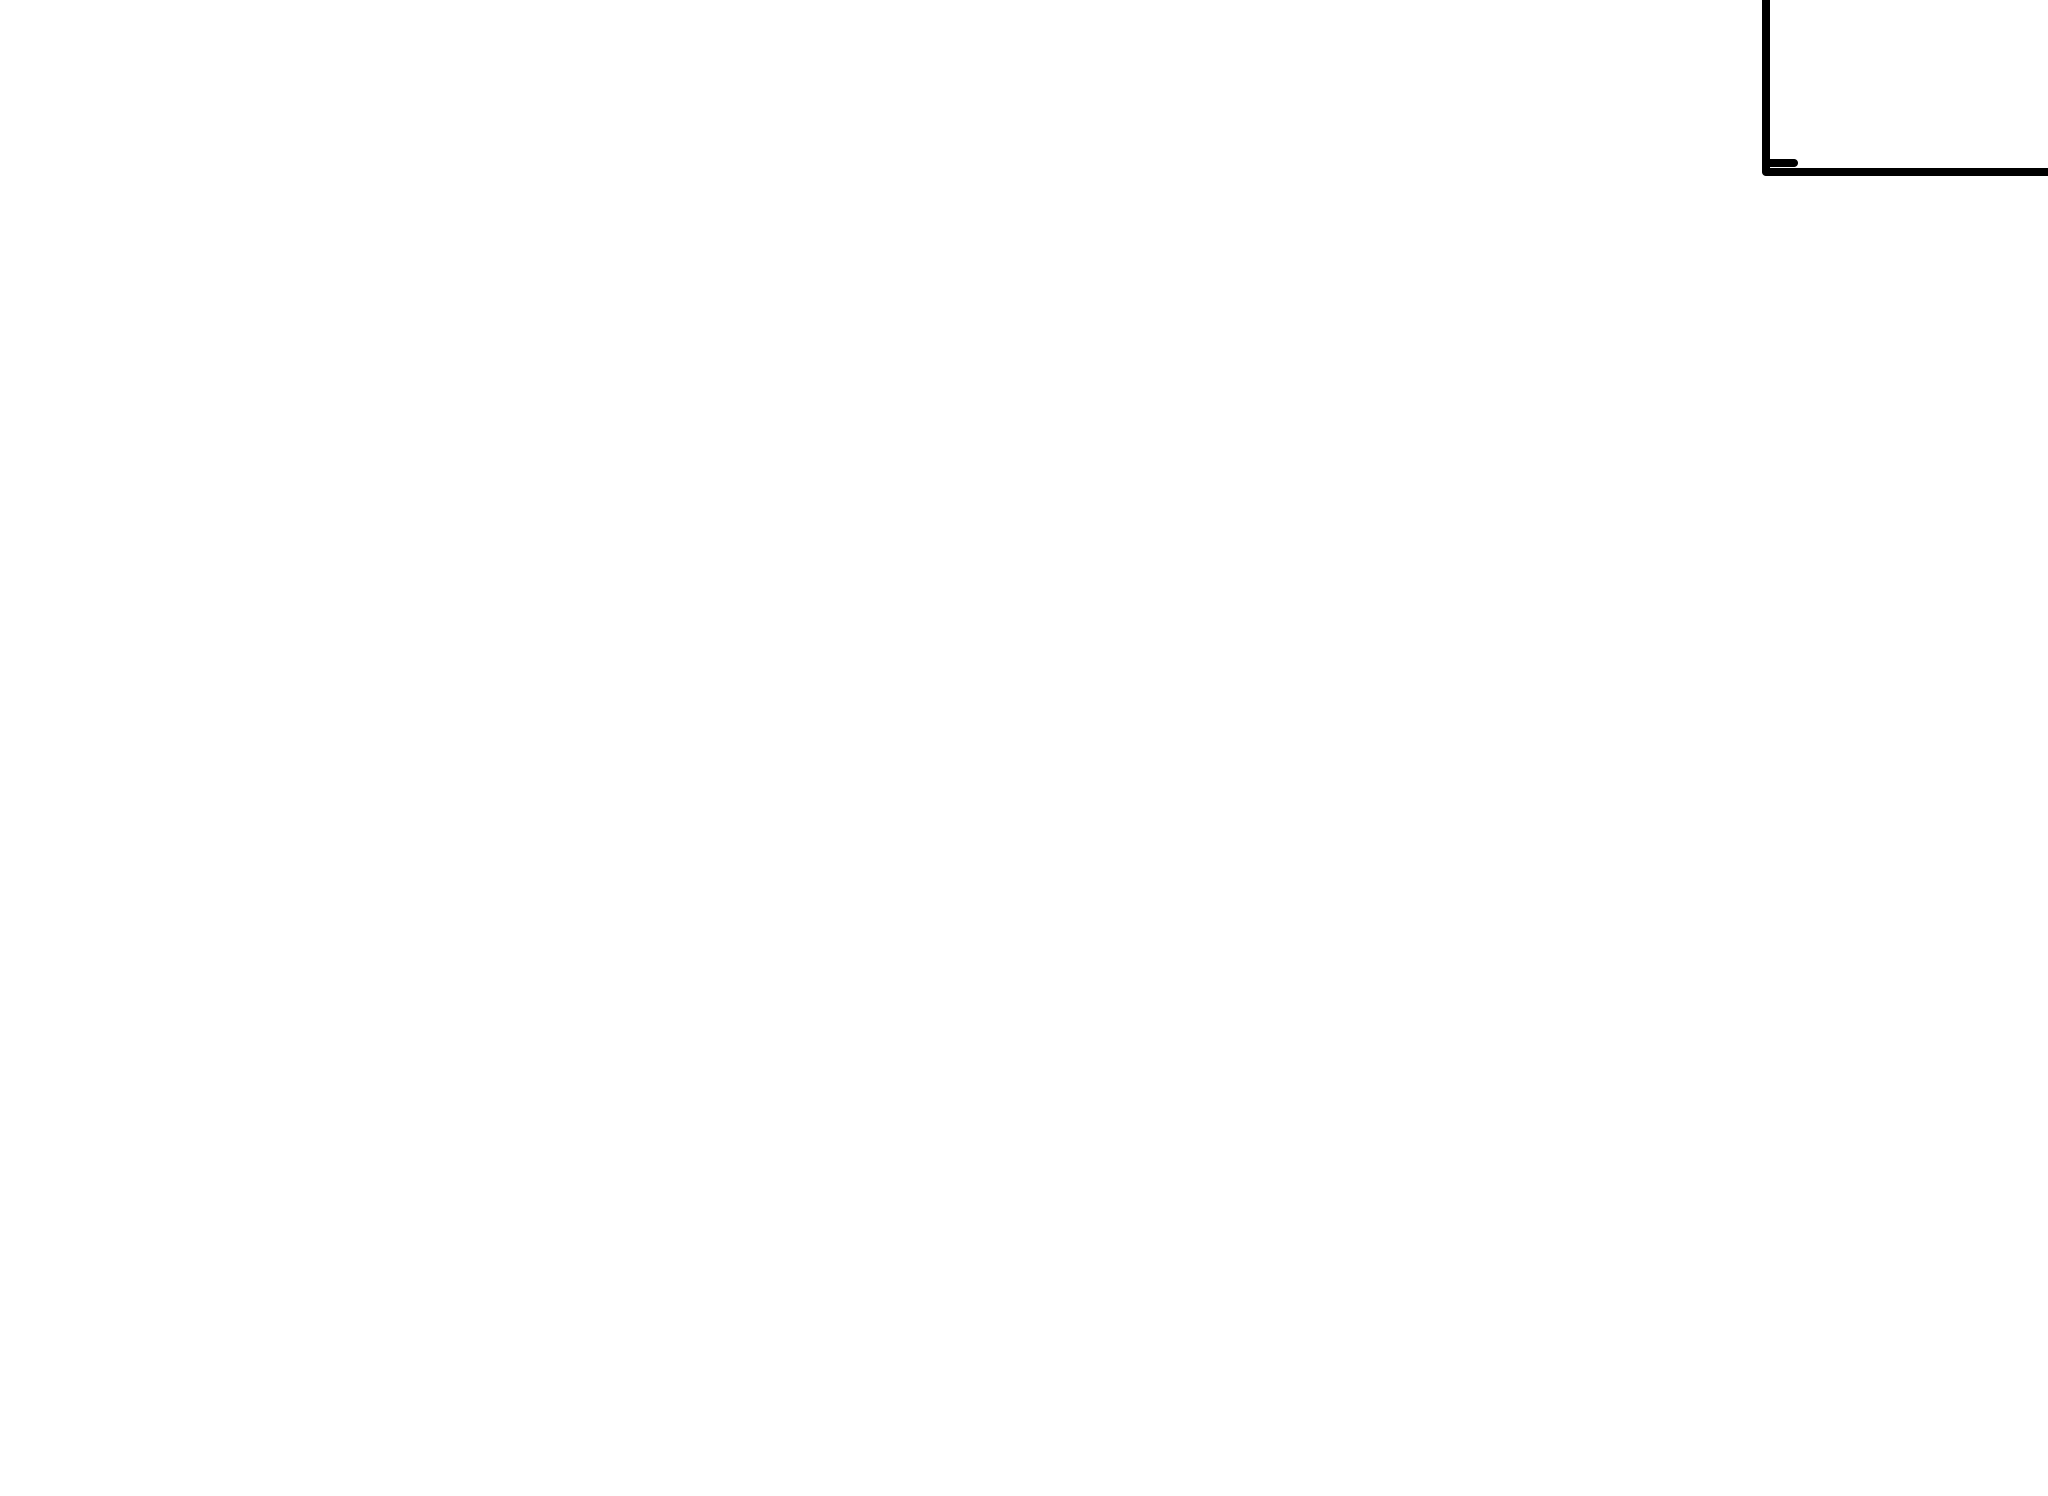

     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              2.381029e+09     using 9 bins.

Test statistic : Chi-Squared              2.381029e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.350791e+09     using 9 bins.

Test statistic : Chi-Squared              1.350791e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm          6:kT        9:norm
9.2467       2428.21      -1      0.898111      0.417571   0.000300521       4.95475   0.000254307
8.52266      980.677      -2      0.746833      0.399777   0.000165231       4.64546   0.000265733
7.64048      2301.

In [11]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 0.5
mo.apec_3.kT = 4.0
Fit.perform()
Plot("data resid")